# Imports

In [1]:
import numpy as np
import pandas as pd
import math

import os

import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Getting File path

In [4]:
path = os.getcwd()
files = os.listdir(path)
print(files[-4])

newPath = path+'\\mergedCleanedCRDataset.csv'
print(newPath)

mergedCleanedCRDataset.csv
C:\Users\nbadr\OneDrive - City St George's, University of London\Intro to AI\Project_IntroToAI\mergedCleanedCRDataset.csv


In [5]:
crDf = pd.read_csv(newPath,sep='\t')
crDf.head()

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft
2,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
3,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
4,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences


# Label Encoding

Converting categorical columns into numerical ones

In [6]:
crEncDf = crDf.copy()

for i in crEncDf.columns:
    if not (i == 'Longitude' or i=='Latitude'):
        labEnc = LabelEncoder()
        crEncDf[i] = labEnc.fit_transform(crEncDf[i])

crEncDf.head()

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,0,9,0,0,-2.492876,51.422716,246246,13087,1481,0
1,0,9,0,0,-2.491146,51.425008,160787,13087,1481,6
2,0,9,0,0,-2.515659,51.408897,45587,13087,1481,13
3,0,9,0,0,-2.491616,51.424619,133151,13087,1481,13
4,0,9,0,0,-2.492876,51.422716,246246,13087,1481,13


# Location Data Normalisation

Here we are normalising the Longitude and Latitude between a 0 to 1 scale, we may lose some data, but it ensures that it is easier for the models to process those columns

In [7]:
crScalDf = crEncDf.copy()

for i in crScalDf.columns:
    if (i == 'Longitude' or i=='Latitude'):
        minMaxScal = MinMaxScaler()
        crScalDf[i] = minMaxScal.fit_transform(crScalDf[i].to_numpy().reshape(-1,1)).flatten()

crScalDf.head()
        

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,0,9,0,0,0.475959,0.259476,246246,13087,1481,0
1,0,9,0,0,0.476172,0.259865,160787,13087,1481,6
2,0,9,0,0,0.473152,0.257133,45587,13087,1481,13
3,0,9,0,0,0.476114,0.259799,133151,13087,1481,13
4,0,9,0,0,0.475959,0.259476,246246,13087,1481,13


# Train Test Split

Train Size is 70%
Test Size is 30% 
Random State is 16

In [8]:
x = crScalDf.drop(columns='Crime type')
y = crScalDf['Crime type']

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3,random_state=16)

# Applying Random Forest Classifier

Implementing a primitive batch fitting

In [26]:
rfcBase1 = RandomForestClassifier()
batchSize = 10000
maxSize = xTrain.size
for i in range(0,maxSize,batchSize):
    rfcBase1.fit(xTrain[i:i+batchSize],yTrain[i:i+batchSize])
    print(i)



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by RandomForestClassifier.

## Accuracy graph for the batched random forest implementation

0.2954


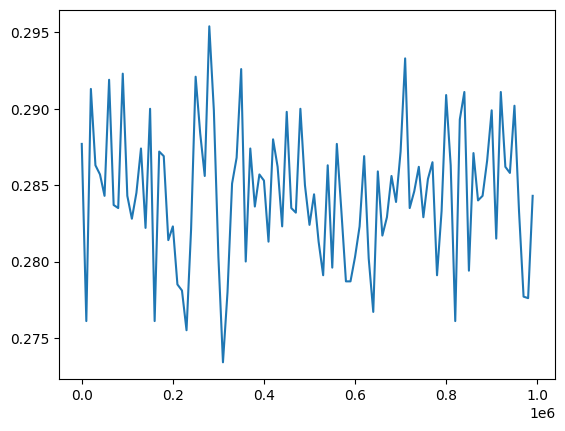

In [35]:
accListX = []
accListY = []
for i in range(0,1000000,batchSize):
    yPred1 = rfcBase1.predict(xTest[i:i+batchSize])
    acc1 = accuracy_score(yTest[i:i+batchSize],yPred1)
    accListX.append(i)
    accListY.append(acc1)
    #print(i," to ",i+batchSize,". Accuracy: ",acc1)

plt.plot(accListX,accListY)
print(np.max(accListY))